# **EDA방법론 세션 이후 과제(~230120)**
노선별 t-test 진행(9월 vs. 11월)
EDA 5조 이성균

### **13145 연세로.명물거리(세브란스병원 방면) (타코벨 앞)**
171, 172, 173, 472, 674, 700, 7024, 서대문03, 서대문04, 서대문05
### **13146 연세로.스타광장(현대백화점 방면) (유플렉스 앞)**
7720, 7727, 7728, 72, 75
### **13324 연세로.문학의거리(연세로.명물거리 방면) (playground 앞)**
171, 172, 173, 472, 674, 700, 7024


차 없는 거리 : 2014년 1월 연세로가 서울시 첫 대중교통전용지구로 지정됨, 왕복 4차로를 2차로로 줄이고 인도 확장. 2018년 4월부터는 금요일 오후 2시부터 버스도 금지해 완전히 차 없는 거리로 만듦(더불어민주당 문석진 전 서대문구청장)

차 없는 거리 해제 : 국민의힘 이성헌 현 서대문구청장 취임(2022.07.01.) 이후, 2022년 10월 9일 오후 10시부터 주말에도 버스 통행 가능, 2023년 1월 20일부터 9월 30일까지 대중교통전용지구 해제 시범운영 및 24시간 전일 차량 통행 가능

전후 변화 : 2022년 10월 9일 전후 13145, 13324 승하차인원 추이 비교 - 9월과 11월의 승차인원 평균이 차이가 있는지 이표본 이분산 t-검정 수행

불리언 인덱싱, loc 함수를 통해 필요한 정보들만 뽑아내어 시각화하려고 시도함.

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
B2212 = pd.read_csv('/content/drive/MyDrive/DSL_EDA/BUS_STATION_BOARDING_MONTH_202212.csv', encoding = 'cp949')
B2211 = pd.read_csv('/content/drive/MyDrive/DSL_EDA/BUS_STATION_BOARDING_MONTH_202211.csv', encoding = 'cp949')
B2210 = pd.read_csv('/content/drive/MyDrive/DSL_EDA/BUS_STATION_BOARDING_MONTH_202210.csv', encoding = 'cp949')
B2209 = pd.read_csv('/content/drive/MyDrive/DSL_EDA/BUS_STATION_BOARDING_MONTH_202209.csv', encoding = 'cp949')
B2208 = pd.read_csv('/content/drive/MyDrive/DSL_EDA/BUS_STATION_BOARDING_MONTH_202208.csv', encoding = 'cp949')
B2207 = pd.read_csv('/content/drive/MyDrive/DSL_EDA/BUS_STATION_BOARDING_MONTH_202207.csv', encoding = 'cp949')

In [30]:
# 13145 정류장(타코벨 앞) 데이터프레임 만드는 함수
def DF13145(df, num):
  tt = df[df['노선번호']==num]
  tt = tt[tt['버스정류장ARS번호']=='13145']
  return tt

dflist_13145 = []
for df in [B2207, B2208, B2209, B2210, B2211, B2212]:
  for num in ['171', '172', '173', '472', '674', '700', '7024', '서대문03', '서대문04', '서대문05']:
    dflist_13145.append(DF13145(df,num).loc[:,['사용일자','노선번호','버스정류장ARS번호','승차총승객수','하차총승객수']])

In [31]:
# 13146 정류장(유플렉스 앞) 데이터프레임 만드는 함수
def DF13146(df, num):
  tt = df[df['노선번호']==num]
  tt = tt[tt['버스정류장ARS번호']=='13146']
  return tt

dflist_13146 = []
for df in [B2207, B2208, B2209, B2210, B2211, B2212]:
  for num in ['7720', '7727', '7728', '72', '75']:
    dflist_13146.append(DF13146(df,num).loc[:,['사용일자','노선번호','버스정류장ARS번호','승차총승객수','하차총승객수']])

In [32]:
# 13324 정류장(playground 앞) 데이터프레임 만드는 함수
def DF13324(df, num):
  tt = df[df['노선번호']==num]
  tt = tt[tt['버스정류장ARS번호']=='13324']
  return tt

dflist_13324 = []
for df in [B2207, B2208, B2209, B2210, B2211, B2212]:
  for num in ['171', '172', '173', '472', '674', '700', '7024']:
    dflist_13324.append(DF13324(df,num).loc[:,['사용일자','노선번호','버스정류장ARS번호','승차총승객수','하차총승객수']])

사용일자를 datetime 패키지 사용해서 요일 입력 후, 금~일 제외해서(차 없는 거리 : 금요일 오후 2시부터 일요일 자정까지) df 새로 생성

In [33]:
import datetime
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [34]:
#13145 정류장 정리

for k in range(0,len(dflist_13145)):
  date = []
  for i in range(0,len(dflist_13145[k].loc[:,'사용일자'])):
    a = pd.DataFrame(dflist_13145[k].loc[:,'사용일자']).iat[i,0]
    date.append(days[datetime.date(int(str(a)[0:4]),int(str(a)[4:6]),int(str(a)[6:8])).weekday()])
  # 요일 칼럼 집어넣기
  dflist_13145[k].insert(0,'요일',date)
  # 금,토,일 삭제
  dflist_13145[k] = dflist_13145[k][(dflist_13145[k]['요일']!='Fri')&(dflist_13145[k]['요일']!='Sat')&(dflist_13145[k]['요일']!='Sun')]

In [35]:
#13146 정류장 정리

for k in range(0,len(dflist_13146)):
  date = []
  for i in range(0,len(dflist_13146[k].loc[:,'사용일자'])):
    a = pd.DataFrame(dflist_13146[k].loc[:,'사용일자']).iat[i,0]
    date.append(days[datetime.date(int(str(a)[0:4]),int(str(a)[4:6]),int(str(a)[6:8])).weekday()])
  # 요일 칼럼 집어넣기
  dflist_13146[k].insert(0,'요일',date)
  # 금,토,일 삭제
  dflist_13146[k] = dflist_13146[k][(dflist_13146[k]['요일']!='Fri')&(dflist_13146[k]['요일']!='Sat')&(dflist_13146[k]['요일']!='Sun')]

In [36]:
#13324 정류장 정리

for k in range(0,len(dflist_13324)):
  date = []
  for i in range(0,len(dflist_13324[k].loc[:,'사용일자'])):
    a = pd.DataFrame(dflist_13324[k].loc[:,'사용일자']).iat[i,0]
    date.append(days[datetime.date(int(str(a)[0:4]),int(str(a)[4:6]),int(str(a)[6:8])).weekday()])
  # 요일 칼럼 집어넣기
  dflist_13324[k].insert(0,'요일',date)
  # 금,토,일 삭제
  dflist_13324[k] = dflist_13324[k][(dflist_13324[k]['요일']!='Fri')&(dflist_13324[k]['요일']!='Sat')&(dflist_13324[k]['요일']!='Sun')]

서대문03 7월~12월 이용객수(13145) 모음

In [37]:
Data_13145_S03 = pd.concat([dflist_13145[7],dflist_13145[17],dflist_13145[27],dflist_13145[37],dflist_13145[47],dflist_13145[57]])
Data_13145_S03

,요일,사용일자,노선번호,버스정류장ARS번호,승차총승객수,하차총승객수
143555,Mon,20220704,서대문03,13145,609,299
183199,Tue,20220705,서대문03,13145,620,269
222880,Wed,20220706,서대문03,13145,628,246
262331,Thu,20220707,서대문03,13145,582,225
420400,Mon,20220711,서대문03,13145,511,224
...,...,...,...,...,...,...
872132,Thu,20221222,서대문03,13145,702,263
1032129,Mon,20221226,서대문03,13145,637,246
1072463,Tue,20221227,서대문03,13145,632,241
1112864,Wed,20221228,서대문03,13145,679,233


**시각화**

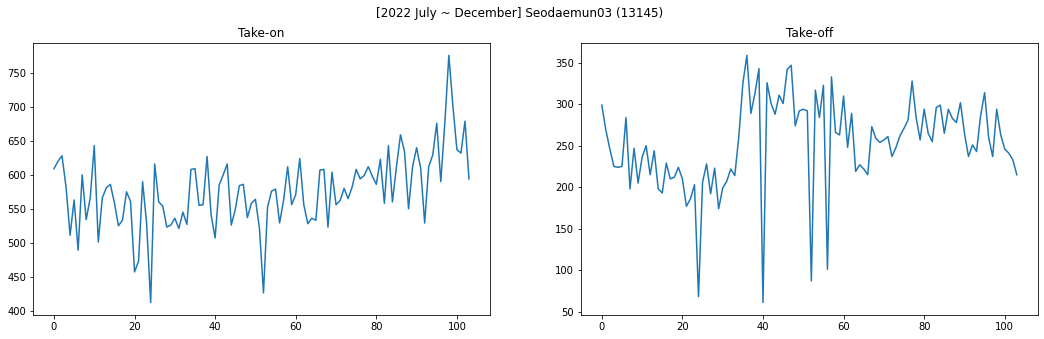

In [44]:
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(list(Data_13145_S03['승차총승객수']))
ax2.plot(list(Data_13145_S03['하차총승객수']))

fig.suptitle('[2022 July ~ December] Seodaemun03 (13145)')
ax1.set_title('Take-on')
ax2.set_title('Take-off')

plt.show()

# **T-Test (유의수준 0.05)**
시각화 목표:  
1) 모든 노선 이용객수 추이(7월~12월)  
2) t-검정 후 유의수준 0.05 넘는지 안넘는지에 따라 Heatmap 그리기

In [45]:
from scipy import stats

타코벨 앞 정류장 - 서대문03 - 9월 vs. 11월 - 승차인원(월~목) 평균 차이가 유의미함

In [46]:
t_stat, p_value = stats.ttest_ind(dflist_13145[27]['승차총승객수'], dflist_13145[47]['승차총승객수'], equal_var=False, alternative="two-sided")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : -2.6146800394274208, p-value : 0.013609959936879221


타코벨 앞 정류장 - 서대문03 - 9월 vs. 11월 - 하차인원(월~목) 평균 차이가 유의미하지 않음

In [ ]:
t_stat, p_value = stats.ttest_ind(dflist_13145[27]['하차총승객수'], dflist_13145[47]['하차총승객수'], equal_var=False, alternative="two-sided")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 1.47915416366082, p-value : 0.15499285778528804
